In [43]:
import open3d as o3d
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import label

In [86]:
loaded_decimated_reference_mesh = o3d.io.read_triangle_mesh(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Basketball\reference_mesh/decimated_reference_mesh.obj', enable_post_processing=False)
print(loaded_decimated_reference_mesh)
subdivided_decimated_reference_mesh = o3d.geometry.TriangleMesh.subdivide_midpoint(loaded_decimated_reference_mesh, number_of_iterations=1)
print(subdivided_decimated_reference_mesh)
loaded_decimated_reference_mesh.compute_vertex_normals()
subdivided_decimated_reference_mesh.compute_vertex_normals()
fitting_mesh_dancer_i = o3d.io.read_triangle_mesh(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Basketball\reference/fitting_mesh_dancer_018.obj', enable_post_processing=False)
fitting_mesh_dancer_i.compute_vertex_normals()
print(fitting_mesh_dancer_i)
#o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, fitting_mesh_dancer_i])


vertices = np.array(subdivided_decimated_reference_mesh.vertices)
x_threshold = 0  # Adjust these thresholds based on your requirements
y_threshold = 0
z_threshold = -1

# Find vertices where x, y, or z is greater than the respective thresholds
selected_ids = [idx for idx in range(vertices.shape[0]) if 
                #vertices[idx, 0] > x_threshold or
                vertices[idx, 1] > y_threshold and
                vertices[idx, 2] < z_threshold]

not_selected_ids = [idx for idx in range(vertices.shape[0]) if 
                #vertices[idx, 1] > y_threshold and
                vertices[idx, 2] > -0.8]

# Create a point cloud from the selected vertices
selected_vertices = vertices[not_selected_ids]
selected_points_cloud = o3d.geometry.PointCloud()
selected_points_cloud.points = o3d.utility.Vector3dVector(selected_vertices)

# Visualize the mesh and the selected points together
o3d.visualization.draw_geometries([subdivided_decimated_reference_mesh, selected_points_cloud])


#loaded_decimated_reference_mesh_vertices

TriangleMesh with 4989 points and 10000 triangles.
TriangleMesh with 19988 points and 40000 triangles.
TriangleMesh with 11955 points and 40000 triangles.


In [10]:
displacement = np.loadtxt(fr'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\output\Basketball\reference/displacements_Basketball_018.txt')

In [81]:
selected_ids.__len__()

2957

In [87]:
not_selected_ids.__len__()

16677

In [88]:
dis_select = []
for i in range (selected_ids.__len__()):
    print(np.linalg.norm(displacement[selected_ids[i]]))
    dis_select.append(np.linalg.norm(displacement[selected_ids[i]]))

0.9403986203461807
0.9167106134980657
0.8715618007347499
0.8681206862464458
0.9461542099996173
0.8854109105020108
0.93067371582365
0.9130151111504125
0.791810817683113
0.7591785218906024
0.9278346700247841
0.8629788587213478
0.8957451361436466
0.869322131433452
0.8705141860992271
0.7582121679319055
0.9131383414625629
0.8421215307780701
0.7453893620786388
0.7253441855422845
0.8846275477080736
0.8838093105240519
0.8867033330968143
0.9092258249170004
0.9030283748592843
0.6361248977991665
0.5483761050592922
0.5645859837969767
0.5777609215756981
0.5747419293039268
0.5662673162032222
0.853193084477365
0.7184231066022305
0.7156605819101678
0.7502213618659495
0.8067387916172124
0.7653287642079056
0.8474926865224266
0.8234935512929048
0.8903599461032601
0.9323517188400523
0.8388970516243337
0.8390884896964086
0.7895896539975685
0.9643287099345326
0.8347452501985261
0.9147746419031302
0.877805060534513
0.6489910536363348
0.6381335735565086
0.6631956484326477
0.6406449832785706
0.6406762546715774

In [89]:
dis_not_select = []
for i in range (not_selected_ids.__len__()):
    print(np.linalg.norm(displacement[not_selected_ids[i]]))
    dis_not_select.append(np.linalg.norm(displacement[not_selected_ids[i]]))

0.9451445420675083
0.3968636249002924
0.3608336495131794
0.4078204457846614
0.40480521956121074
0.3700149982311528
0.3824574212327432
0.1604888902977399
0.3288769120278892
0.2403098573196697
0.2766203043180308
0.1576869484928921
0.20566352004183922
0.13283751213418593
0.23404058634561656
0.2768299281743215
0.2996716129532459
0.23456456749688348
0.28160484921428464
0.2516175123178035
0.25735938985201223
0.21219149653084593
0.26400676243043475
0.3139224773347713
0.28217596176853904
0.28867505666579507
0.3029634959429931
0.17111657550336848
0.17242056621238663
0.1459269159305438
0.19185164776201427
0.12668253099776622
0.251712198474766
0.21622775310537728
0.1892098053378841
0.21044691016976227
0.2176433572521799
0.2165802246859117
0.16752182632719834
0.20277787262174343
0.49023912475036097
0.5594969474304574
0.561977687301729
0.49682147806732346
0.22544488480335942
0.09022320253681977
0.3203984969627667
0.2477293204305861
0.2009849024926997
0.14792917332629152
0.257175752686757
0.20271061

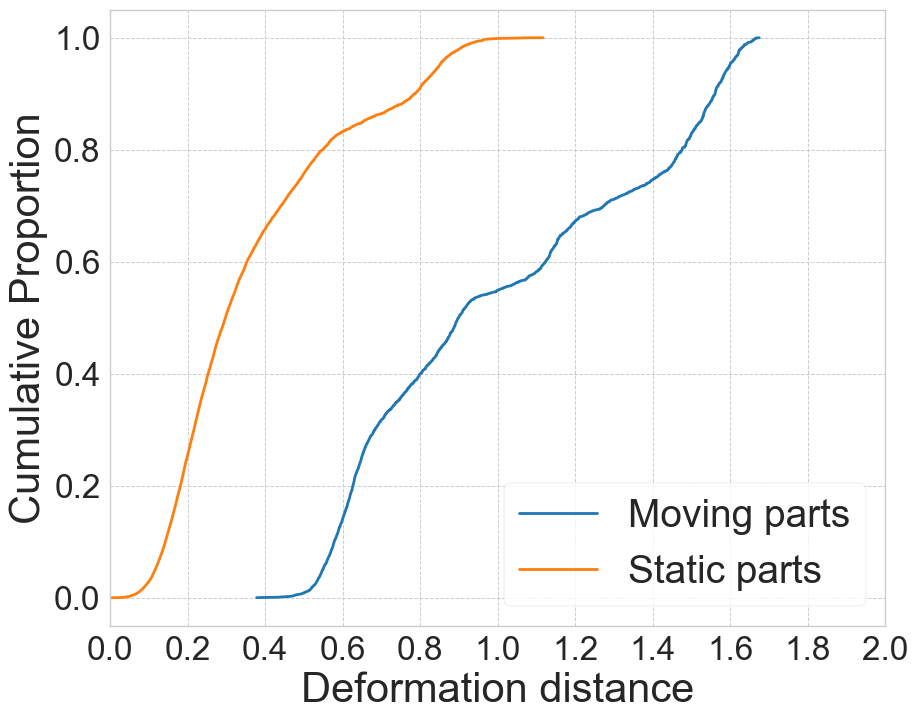

In [136]:
cumulative_select = np.linspace(0, 1, len(dis_select))

sorted_data_select = np.sort(dis_select)
sorted_data_not_select = np.sort(dis_not_select)

cumulative_data_select = np.cumsum(sorted_data_select) / np.sum(sorted_data_select)
cumulative_data_not_select = np.cumsum(sorted_data_not_select) / np.sum(sorted_data_not_select)

plt.figure(figsize=(10, 8))
plt.plot(sorted_data_select, cumulative_data_select, label="Moving parts", linewidth=2, color='#1f77b4')
plt.plot(sorted_data_not_select, cumulative_data_not_select, label="Static parts", linewidth=2, color='#ff7f0e')
plt.legend(fontsize=28, loc = 'lower right', frameon=True) 
plt.xlabel("Deformation distance", fontsize=30)
plt.ylabel("Cumulative Proportion", fontsize=30)
plt.xlim(left=0)
x_min, x_max = plt.xlim()  
plt.xticks(np.arange(0, np.ceil(x_max) + 0.2, 0.2), fontsize=24) 
plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.title("Cumulative Distribution Function (CDF)")
plt.savefig(r"G:\PycharmProjects\Mesh_Editing\Results/cumulative_distribution_function_basketball.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_29920\737546881.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


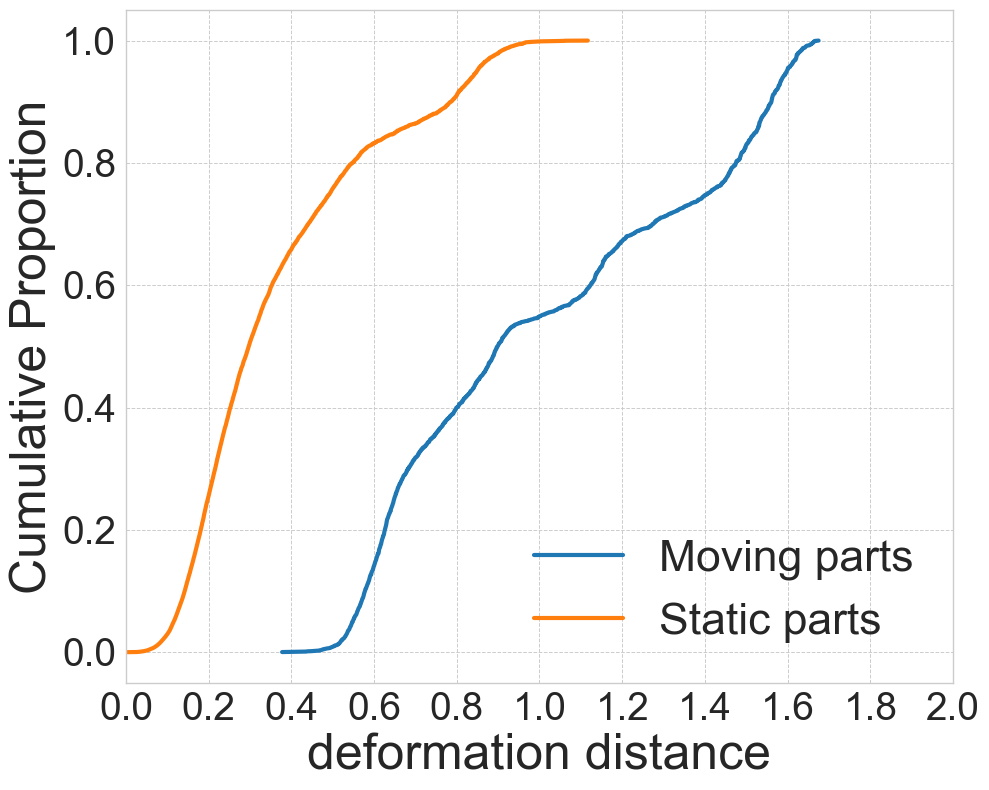

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Set a clean style with professional aesthetics
plt.style.use('seaborn-whitegrid')

# Create the figure with larger dimensions for a paper
plt.figure(figsize=(10, 8))

# Plot the data with thicker lines and better color scheme
plt.plot(sorted_data_select, cumulative_data_select, label="Moving parts", linewidth=3, color='#1f77b4')  # Blue
plt.plot(sorted_data_not_select, cumulative_data_not_select, label="Static parts", linewidth=3, color='#ff7f0e')  # Orange

# Add legend with proper size and position
plt.legend(fontsize=32, loc = 'lower right') 
plt.xlabel("deformation distance", fontsize=36)
plt.ylabel("Cumulative Proportion", fontsize=36)
plt.xlim(left=0)
x_min, x_max = plt.xlim()  
plt.xticks(np.arange(0, np.ceil(x_max) + 0.2, 0.2), fontsize=28) 
plt.yticks(fontsize=28)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
#plt.title("Cumulative Distribution Function (CDF)")
plt.savefig(r"G:\PycharmProjects\Mesh_Editing\Results/cumulative_distribution_function.png", dpi=300, bbox_inches='tight')

# Show the final plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
